In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio as iio

In [2]:
from os import listdir
#from sklearn.feature_extraction.image import extract_patches_2d
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from joblib import Parallel, delayed
#from skimage import feature
#from patchify import patchify


In [3]:
filename = str(input())
path = 'Braile Dataset\\' + filename

Silence.png


# Pré-Processamento
Nessa etapa vamos pegar a imagem lida na celula anterior, deixa-la cinza e binarizar a imagem


In [4]:
#Tasks
#Filtro default que estamos usando, reduz o barulho bem
def meanFilter(img, filter_size):
    
    x = img.shape[0]
    y = img.shape[1]
    
    pad_size = int(((filter_size - 1) / 2))
    
    img_pad = np.pad(img, (pad_size, pad_size), constant_values = 255)

    for i in range (x):
        for j in range(y):
            img[i, j] = img_pad[i: i + filter_size,j: j + filter_size].sum()/img_pad[i: i + filter_size,j : j + filter_size].size 
            
    return img

In [5]:
#Filtro alternativo, para eventualidade de mudar
def medianFilter(img, filter_size):
    
    x = img.shape[0]
    y = img.shape[1]
    
    pad_size = int(((filter_size - 1) / 2))
    
    img_pad = np.pad(img, (pad_size, pad_size), constant_values = 255)

    for i in range (x):
        for j in range(y):
            W = np.sort(img_pad[i: i + filter_size,j: j + filter_size].flatten())
            img[i,j] = np.median(W)
            
    return img 

In [6]:
# Normalização min max
def min_max(img):
    min = np.amin(img)
    max = np.amax(img)
    
    if (max - min > 0): 
        img_res = (img - min)/(max - min)
    else : 
        img_res = img 
    
    return img_res;

In [7]:
#Transforma a imagem em gray-scale
def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = min_max(new_img)
    
    return new_img

In [8]:
#Abre a imagem
img_src = iio.imread(path)

#Deixa a imagem cinza e normaliza para o intervalo de 0 a 255
img_gray = Luminance(img_src)
img_gray = min_max(img_gray)
img_gray = (img_gray*255).astype(np.uint8)

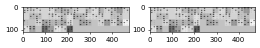

In [9]:
plt.figure(dpi=50) # change image size

plt.subplot(121) # imagem aberta
plt.imshow(img_src, cmap = "gray")

plt.subplot(122) # grayscale + normalizacao [0-255]
plt.imshow(img_gray, cmap = "gray")


In [10]:
#Binariza, deixa o fundo preto e os circulos brancos, para a operação FindK
def Binarize(img, T):
    return np.where(img > T, 0, 1);

In [11]:
# Usa o filtro para reduzir barulho
img_filtered = meanFilter(img_gray,5)

img_bin = Binarize(img_filtered, 175)

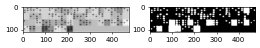

In [12]:
plt.figure(dpi=50) # change image size

plt.subplot(121) # barulho filtrado (blur)
plt.imshow(img_filtered, cmap = "gray")

plt.subplot(122) # binary
plt.imshow(img_bin, cmap = "gray")

In [13]:
#Para a k-means, que vai achar os centroides da nova imagem a ser gerada,
#corta a imagem em seis, seria interessante garantir que a imagem está orientada e
#posicionada corretamente antes de fazer isso
#Rever comentario acima, não faz mais sentido


def Discretize(img):
    x,y = img.shape
    
    stepx = x// 3
    stepy = y// 2
    
    img_discrete = np.zeros((6, 1))
    
    img_cut = []
    
    #Corta a imagem em 6
    for i in range(0, x, stepx):
        for j in range(0, y, stepy):
            img_cut.append(img[i : i + stepx, j : j + stepy])

    for i in range(6):
        if(img_cut[i].sum() > 0):
            img_discrete[i] = 1;
    
    #plt.figure(2)
    
    
    #plt.subplot(321)
    #plt.imshow(img_cut[0], cmap = "gray")

    #plt.subplot(322)
    #plt.imshow(img_cut[1], cmap = "gray")
    
    #plt.subplot(323)
    #plt.imshow(img_cut[2], cmap = "gray")
    
    #plt.subplot(324)
    #plt.imshow(img_cut[3], cmap = "gray")

    #plt.subplot(325)
    #plt.imshow(img_cut[4], cmap = "gray")

    #plt.subplot(326)
    #plt.imshow(img_cut[5], cmap = "gray")    
    return img_discrete;

img_discrete = Discretize(img_bin)

img_discrete = np.reshape(img_discrete, (3,2))

#plt.figure(3)
    
#plt.subplot(111)
#plt.imshow(img_discrete, cmap="gray")



In [14]:
#Potencial problema, imagens não tem a mesma dimensao, reshape pode dar errado
#Seria legal com base na imagem binarizada gerar um nova imagem com um circulo melhor e na escala desejada
# Escala desejada = Escala das imagens no dicionario
#def euclidian_Distance(img_test, img_dict):
#    return np.sqrt(np.sum(np.square(img_test - img_dict)))


In [15]:
#Funcional
#    plt.subplot(231)
#    plt.imshow(img_cut[0], cmap = "gray")

#    plt.subplot(232)
#    plt.imshow(img_cut[1], cmap = "gray")
    
#    plt.subplot(233)
#    plt.imshow(img_cut[2], cmap = "gray")
    
#    plt.subplot(234)
#    plt.imshow(img_cut[3], cmap = "gray")

#    plt.subplot(235)
#    plt.imshow(img_cut[4], cmap = "gray")

#    plt.subplot(236)
#    plt.imshow(img_cut[5], cmap = "gray")    


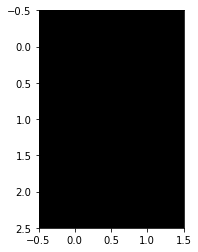

In [16]:
f = open("Dictionay.txt", 'r')
bin_dictionary = []
chars = 27

for i in range(chars):
    bit = f.read(6)
    
    vet = list(map(np.float32, bit))
    vet = np.reshape(vet, (3,2))
    bin_dictionary.append(vet)

plt.figure(4)
    
plt.subplot(111)
plt.imshow(vet, cmap="gray")



In [17]:
for i in range(len(bin_dictionary)):
    if(np.array_equiv(bin_dictionary[i], img_discrete)):
        if(i == 27):
            print(" ")
        else:
            print(chr(i + 97))

{


In [18]:
def braile_to_text(img_src):
    #Etapa 1 - Carrega o dicionario
    f = open("Dictionay.txt", 'r')
    bin_dictionary = []
    chars = 27

    for i in range(chars):
        bit = f.read(6)

        vet = list(map(np.float32, bit))
        vet = np.reshape(vet, (3,2))
        bin_dictionary.append(vet)
    
    #Deixa a imagem cinza e normaliza para o intervalo de 0 a 255
    img_gray = Luminance(img_src)
    img_gray = min_max(img_gray)
    img_gray = (img_gray*255).astype(np.uint8)
    
    # Usa o filtro para reduzir barulho
    img_filtered = meanFilter(img_gray,5)
    
    #Binariza a imagem
    img_bin = Binarize(img_filtered, 175)
    
    #Pega a imagem binarizada e gera uma imagem 3x2 dizendo onde há ou não uma bolinha
    img_discrete = Discretize(img_bin)

    img_discrete = np.reshape(img_discrete, (3,2))

    #Compara com o dicionario e printa a letras
    for i in range(len(bin_dictionary)):
        if(np.array_equiv(bin_dictionary[i], img_discrete)):
            if(i == 26):
                return chr(32)
            else:
                return chr(i + 97)
        
                
x= img_src.shape[0]
y = img_src.shape[1]

row_ele = x // 28
line_ele = y // 28

startx= 0
starty = 0

print(row_ele, line_ele)


plt.figure(4)
    
lista = []
    
for i in range(row_ele):
    startx = 0
    starty = 28 * i
    for j in range(line_ele):
        
        img_slice = img_src[starty: starty + 28, startx : startx + 28]
        
        lista.append(braile_to_text(img_slice))
        
        startx = 28 * (j + 1)

string = ""
    
print(lista)

print(string.join(lista))
    

4 17
['t', 'h', 'e', ' ', 'f', 'i', 'r', 's', 't', ' ', 's', 'i', 'l', 'e', 'n', 'c', 'e', ' ', 'i', 's', ' ', 'd', 'e', 's', 'c', 'r', 'i', 'b', 'e', 'd', ' ', 'a', 's', ' ', 'a', ' ', 'h', 'o', 'l', 'l', 'o', 'w', ' ', 'o', 'r', ' ', 'e', 'c', 'h', 'o', 'i', 'i', 'g', ' ', 'q', 'u', 'i', 'e', 't', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
the first silence is described as a hollow or echoiig quiet         


<Figure size 432x288 with 0 Axes>